# Lab 21 - k-means clustering

We will use the labor market data set from Lab 20.  It is available [here](http://comet.lehman.cuny.edu/owen/teaching/mat328/Nov2019_labor_market_majors.csv).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

### Clustering labor market data using k-means

Let's load the labor market data into a dataframe called `labor`.  Remember to skip the first 13 rows and the last 3 rows, and to set the `Major` column as the index.

In [3]:
labor = pd.read_csv("labor_market.csv", index_col = "Major")

Check your dataframe was created correctly.

In [4]:
labor.head()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
Major,,,,,
Agriculture,3.1,53.9,"40,000","60,000",20.8
Animal and Plant Sciences,3.0,57.4,"35,000","60,000",34.8
Environmental Studies,4.6,49.3,"36,000","65,000",32.2
Architecture,4.3,26.6,"45,000","75,000",37.4
Ethnic Studies,5.7,50.1,"38,000","57,000",49.4


Which two columns are not numerical types (integers or floats)?  Can you guess why?

Removes the commas in the `Median Wage Early Career` and `Median Wage Mid-Career` columns, and convert them to be of type float.

In [5]:
labor["Median Wage Early Career"] = labor["Median Wage Early Career"].str.replace(",","").astype(float)
labor["Median Wage Mid-Career"] = labor["Median Wage Mid-Career"].str.replace(",","").astype(float)

Check the conversion happened correctly.

In [8]:
labor.dtypes

Unemployment Rate             float64
Underemployment Rate          float64
Median Wage Early Career      float64
Median Wage Mid-Career        float64
Share with Graduate Degree    float64
dtype: object

As the k-means clustering algorithm also uses the distance between data points, we need to scale the data in each column to be between 0 and 1.

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
labor_scaled = scaler.fit_transform(labor)

Put the scaled data back into a dataframe, using the column and index names from the original data set.

In [12]:
labor_scaled = pd.DataFrame(labor_scaled, columns = labor.columns, index = labor.index)
labor_scaled.head()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
Major,,,,,
Agriculture,0.308824,0.687702,0.263158,0.256757,0.172185
Animal and Plant Sciences,0.294118,0.744337,0.131579,0.256757,0.403974
Environmental Studies,0.529412,0.613269,0.157895,0.324324,0.360927
Architecture,0.485294,0.245955,0.394737,0.459459,0.447020
Ethnic Studies,0.691176,0.626214,0.210526,0.216216,0.645695


<details> <summary>Answer:</summary>
<code>labor_scaled = pd.DataFrame(labor_scaled, columns = labor.columns, index = labor.index)
</code>
</details>

Let's run k-means clustering on the data.  As with other sci-kit learn algorithm, we first create a KMeans variable (object) with the number of clusters, and then apply it to our data.

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_clusters = kmeans.fit_predict(labor_scaled)
kmeans_clusters

array([2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1, 0, 1, 1, 3, 1, 1,
       2, 2, 0, 1, 3, 1, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       3, 2, 3, 1, 1, 3, 2, 2])

Store these cluster assignments in the `labor` dataframe in a column called `kmeans_clusters`.

In [14]:
labor["kmeans_clusters"] = kmeans_clusters

<details> <summary>Answer:</summary>
<code>labor["kmeans_clusters"] = kmeans_clusters
</code>
</details>

Now use the hierarchical clustering from Lab 20 to also cluster the data into 4 groups.

In [15]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(labor_scaled)
clusters

array([2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2,
       1, 2, 1, 0, 0, 1, 2, 2], dtype=int64)

Store these cluster assignments in the `labor` dataframe in a column called `tree_cluster`.

In [16]:
labor["tree_clusters"] = clusters

Display the dataframe `labor` and check that that two new columns were added correctly.

In [17]:
labor.head()

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,kmeans_clusters,tree_clusters
Major,,,,,,,
Agriculture,3.1,53.9,40000.0,60000.0,20.8,2,2
Animal and Plant Sciences,3.0,57.4,35000.0,60000.0,34.8,2,2
Environmental Studies,4.6,49.3,36000.0,65000.0,32.2,2,2
Architecture,4.3,26.6,45000.0,75000.0,37.4,3,0
Ethnic Studies,5.7,50.1,38000.0,57000.0,49.4,1,0


Compare the clusters by using a filter to display only the rows with the first k-means clusters.  How does this cluster differ from the hierarchical one?

In [20]:
first_kmean_cluster_filter = labor["kmeans_clusters"] == 0
first_kmean_cluster = labor[first_kmean_cluster_filter]
first_kmean_cluster

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,kmeans_clusters,tree_clusters
Major,,,,,,,
General Education,1.7,22.2,36000.0,45000.0,47.4,0,3
Early Childhood Education,1.7,19.2,32100.0,41000.0,38.2,0,3
Elementary Education,1.9,15.9,35000.0,43000.0,47.0,0,3
Secondary Education,2.3,23.5,38000.0,50000.0,48.4,0,3
Special Education,2.9,16.2,37000.0,45000.0,60.8,0,3
Miscellaneous Education,1.2,17.5,37000.0,48000.0,55.3,0,3
Theology and Religion,1.0,46.9,32000.0,49000.0,42.2,0,2
Social Services,3.5,31.5,31300.0,44200.0,47.4,0,0


Now do the same thing for each of the other 3 k-means clusters.

In [28]:
second_kmean_cluster_filter = labor["kmeans_clusters"] == 1
second_kmean_cluster = labor[second_kmean_cluster_filter]
second_kmean_cluster

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,kmeans_clusters,tree_clusters
Major,,,,,,,
Ethnic Studies,5.7,50.1,38000.0,57000.0,49.4,1,0
Foreign Language,4.2,46.2,35000.0,60000.0,50.0,1,0
English Language,5.3,50.6,35000.0,60000.0,45.5,1,0
Biology,4.6,44.6,35000.0,65000.0,63.2,1,0
Biochemistry,3.1,33.5,40000.0,75000.0,70.8,1,0
Miscellaneous Biological Sciences,3.9,46.5,35000.0,60000.0,60.4,1,0
Nutrition Sciences,5.8,47.9,35000.0,54000.0,46.4,1,0
Philosophy,6.2,50.9,36000.0,62000.0,57.3,1,0
Chemistry,3.9,35.4,41000.0,74000.0,65.0,1,0


In [27]:
third_kmean_cluster_filter = labor["kmeans_clusters"] == 2
third_kmean_cluster = labor[third_kmean_cluster_filter]
third_kmean_cluster

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,kmeans_clusters,tree_clusters
Major,,,,,,,
Agriculture,3.1,53.9,40000.0,60000.0,20.8,2,2
Animal and Plant Sciences,3.0,57.4,35000.0,60000.0,34.8,2,2
Environmental Studies,4.6,49.3,36000.0,65000.0,32.2,2,2
Communications,3.9,53.0,40000.0,70000.0,23.3,2,2
Journalism,3.7,42.5,38000.0,65000.0,25.3,2,2
Mass Media,7.8,55.2,35000.0,60000.0,18.3,2,2
Advertising and Public Relations,3.7,47.7,40000.0,72000.0,18.3,2,2
Family and Consumer Sciences,4.3,44.6,32000.0,50000.0,32.5,2,2
Liberal Arts,6.7,58.4,33400.0,60000.0,27.8,2,2


In [26]:
fourth_kmean_cluster_filter = labor["kmeans_clusters"] == 3
fourth_kmean_cluster = labor[fourth_kmean_cluster_filter]
fourth_kmean_cluster

,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree,kmeans_clusters,tree_clusters
Major,,,,,,,
Architecture,4.3,26.6,45000.0,75000.0,37.4,3,0
Information Systems and Management,5.0,38.1,50000.0,75000.0,24.0,3,1
Computer Science,4.7,23.5,62000.0,95000.0,32.3,3,1
General Engineering,5.0,23.5,60000.0,88000.0,36.2,3,1
Aerospace Engineering,4.1,26.8,64000.0,100000.0,52.9,3,1
Chemical Engineering,2.6,21.6,68000.0,103000.0,48.8,3,1
Civil Engineering,1.9,17.5,60000.0,90000.0,37.7,3,1
Computer Engineering,2.5,20.1,65000.0,106000.0,39.9,3,1
Electrical Engineering,4.6,22.3,65000.0,100000.0,44.8,3,1


Compute the confusion matrix for the k-means clusters and the tree clusters.

In [29]:
confusion_matrix(labor["kmeans_clusters"], labor["tree_clusters"])

array([[ 1,  0,  1,  6],
       [19,  0,  0,  0],
       [ 0,  0, 25,  0],
       [ 4, 18,  0,  0]], dtype=int64)

<details> <summary>Answer:</summary>
<code>confusion_matrix(labor["kmeans_clusters"],labor["tree_clusters"])
</code>
</details>

### Clustering digit images

Roughly follows the example [here])https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html_

Sci-kit learn contains images of hand-written digits.  Each digit has been encoded as an 8 pixel x 8 pixel image, and the 8x8 = 64 pixels are each stored as a number representing the darkness of that pixel.

See [here](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html) for example images of the digits.

First we load the digits.  As with the other sci-kit learn datasets, it's stored as a dictionary.

In [30]:
digits = datasets.load_digits()

Display the possible keys.

In [32]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

We will just use the data directly as `digits.data` instead of making a dataframe from it (notice there is no list of features or column names here).

Run the k-means clustering algorithm with 10 clusters (for digits 0-9) on this data.

In [33]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(digits.data)
kmeans_clusters

array([5, 7, 7, ..., 7, 3, 3])

<details> <summary>Answer:</summary>
<code>kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
</code>
</details>

We can get the centers of the clusters using `kmeans.cluster_centers_`.  Try it below.

In [34]:
kmeans.cluster_centers_

array([[ 0.00000000e+00, -9.99200722e-16,  3.07228916e-01,
         7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
         1.50602410e-01,  5.42168675e-02, -2.25514052e-17,
         1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
         8.46385542e+00,  1.53012048e+00,  9.75903614e-01,
         2.77108434e-01, -1.12757026e-17,  6.44578313e-01,
         1.07108434e+01,  1.15602410e+01,  4.33734940e+00,
         5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
         6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
         5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
         6.21686747e+00,  1.80722892e-02,  0.00000000e+00,
         8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
         1.28132530e+01,  1.43915663e+01,  5.48192771e+00,
         0.00000000e+00,  9.63855422e-02,  6.50602410e+00,
         1.16867470e+01,  1.23433735e+01,  1.48373494e+01,
         1.07590361e+01,  1.56626506e+00, -4.16333634e-17,
         6.02409639e-02,  1.11445783e+00,  3.00000000e+0

These centers are not easy to interpret as numbers, but we can plot them with the following code.

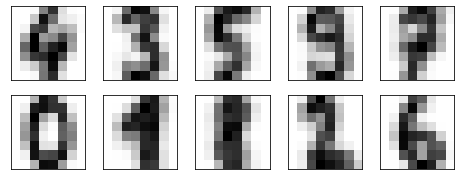

In [35]:
# Create 10 sub-plots
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
# Split the data in 10 groups of 8x8
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
# For each of the 10 centers, using one of the 10 subplots:
for axi, center in zip(ax.flat, centers):
    # reset the x and y axes on that subplot
    axi.set(xticks=[], yticks=[])
    # plot the image
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)